In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sys
import os
sys.path.append('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/scripts/')
import data_cleaning

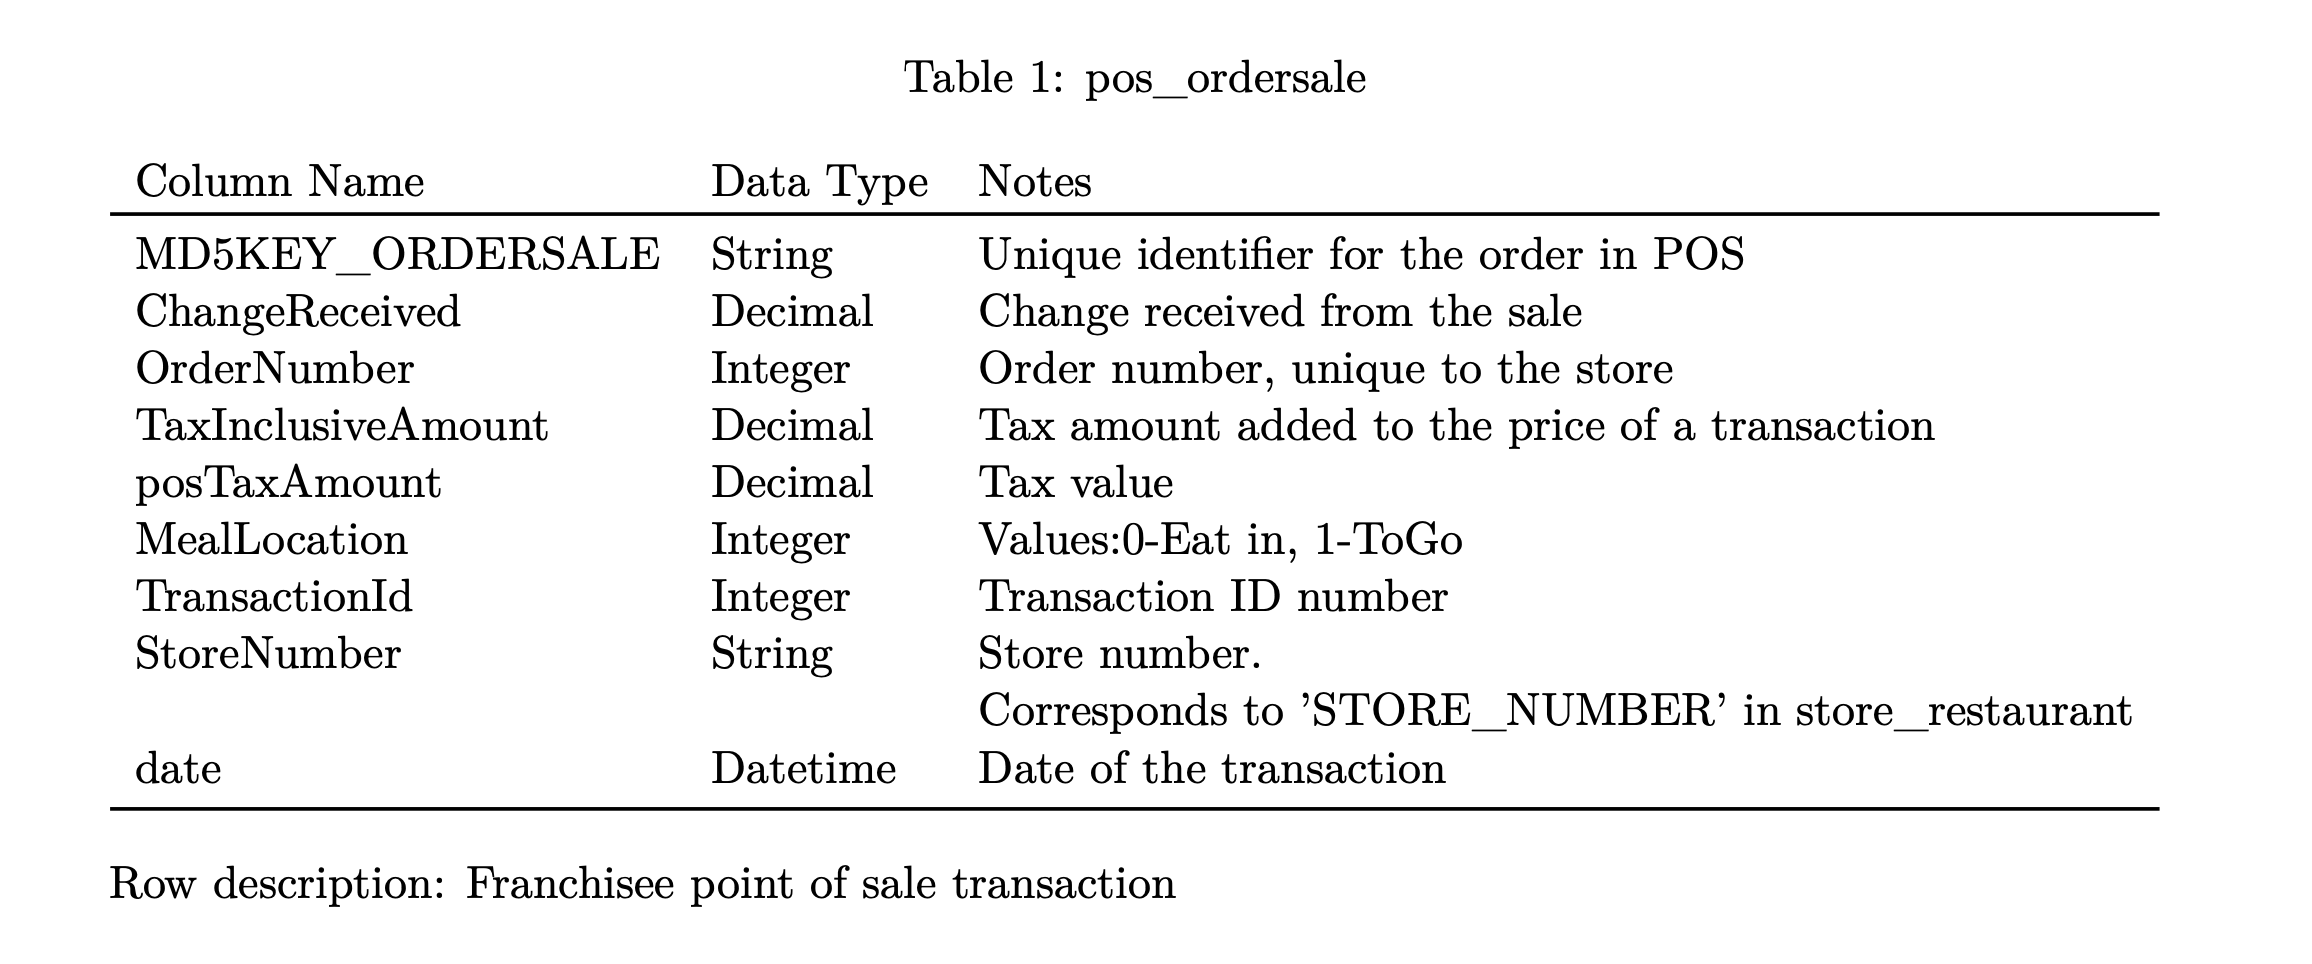
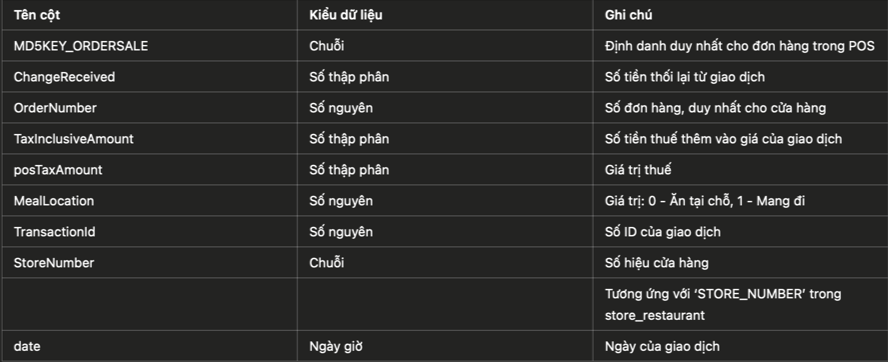

In [3]:
df = pd.read_csv('/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/raw/pos_ordersale.csv')

In [4]:
df.head(10)

,MD5KEY_ORDERSALE,ChangeReceived,OrderNumber,TaxInclusiveAmount,TaxAmount,MealLocation,TransactionId,StoreNumber,date
0,00BCB738A1F814DB960C25012E9913DF,0.00,67,0,0.56,0,67,46673,15-03-05
1,03438C257BC2DD0037F35EC8BFC0C8E2,3.46,39,0,0.54,0,39,12631,15-03-05
2,04AEF56CF3130AC1EFAD41C470F5245D,0.00,81,0,0.69,0,79,46673,15-03-05
3,04BBFAD4E73C30EE2EC3B4E52509637C,0.00,159,0,1.16,0,159,12631,15-03-05
4,061AE382DC127057E8ADBBF869CFB361,0.00,51,0,0.00,0,51,12631,15-03-05
5,0653EFBC62931D45E96BFB82040123EA,94.01,83,0,0.49,0,83,12631,15-03-05
6,0683B0A81C854E7BBE3B2CFD3D75D62C,0.00,40,0,0.00,0,40,12631,15-03-05
7,072D3B76BE58E4553A373AF3206D2CA5,0.00,90,0,0.90,0,87,46673,15-03-05
8,07436936F3929B875D3128106550394F,0.00,19,0,0.79,0,19,46673,15-03-05
9,09F16AC6C629944163B1E60A4CF104F0,0.00,7,0,1.16,0,7,12631,15-03-05


In [5]:
df.shape

(43228, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43228 entries, 0 to 43227
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MD5KEY_ORDERSALE    43228 non-null  object 
 1   ChangeReceived      43228 non-null  float64
 2   OrderNumber         43228 non-null  int64  
 3   TaxInclusiveAmount  43228 non-null  int64  
 4   TaxAmount           43228 non-null  float64
 5   MealLocation        43228 non-null  int64  
 6   TransactionId       43228 non-null  int64  
 7   StoreNumber         43228 non-null  int64  
 8   date                43228 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 3.0+ MB


In [7]:
df.isna().sum()

MD5KEY_ORDERSALE      0
ChangeReceived        0
OrderNumber           0
TaxInclusiveAmount    0
TaxAmount             0
MealLocation          0
TransactionId         0
StoreNumber           0
date                  0
dtype: int64

In [8]:
# Convert the date column to the datetime data type
df['date'] = pd.to_datetime(df['date'], format='%y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43228 entries, 0 to 43227
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MD5KEY_ORDERSALE    43228 non-null  object        
 1   ChangeReceived      43228 non-null  float64       
 2   OrderNumber         43228 non-null  int64         
 3   TaxInclusiveAmount  43228 non-null  int64         
 4   TaxAmount           43228 non-null  float64       
 5   MealLocation        43228 non-null  int64         
 6   TransactionId       43228 non-null  int64         
 7   StoreNumber         43228 non-null  int64         
 8   date                43228 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 3.0+ MB


In [10]:
df.groupby('StoreNumber').agg(TotalRevenue=('OrderNumber', 'count'))

,TotalRevenue
StoreNumber,
4904,16036
12631,11960
20974,8035
46673,7197


In [11]:
df.groupby('MealLocation')['MealLocation'].count()

MealLocation
0    35417
1     7811
Name: MealLocation, dtype: int64

## Kiểm tra và xử lý khoảng trắng

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43228 entries, 0 to 43227
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   MD5KEY_ORDERSALE    43228 non-null  object        
 1   ChangeReceived      43228 non-null  float64       
 2   OrderNumber         43228 non-null  int64         
 3   TaxInclusiveAmount  43228 non-null  int64         
 4   TaxAmount           43228 non-null  float64       
 5   MealLocation        43228 non-null  int64         
 6   TransactionId       43228 non-null  int64         
 7   StoreNumber         43228 non-null  int64         
 8   date                43228 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 3.0+ MB


In [14]:
df['MD5KEY_ORDERSALE'].unique()

array(['00BCB738A1F814DB960C25012E9913DF',
       '03438C257BC2DD0037F35EC8BFC0C8E2',
       '04AEF56CF3130AC1EFAD41C470F5245D', ...,
       'FD23743074BCCB6E0847269D09F458AE',
       'FD570797AC0A9AFC3953A30EC5355829',
       'FF181C8AF4B9B9BD8912B2926464EB08'], dtype=object)

## Lưu trữ file sau khi xử lý

In [15]:
current_date = datetime.now().strftime("%Y%m%d")
parent_dir = "/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/processed" 

# Tạo đường dẫn đầy đủ cho thư mục mới
new_folder_path = os.path.join(parent_dir, current_date)

# Kiểm tra xem thư mục đã tồn tại chưa, nếu chưa thì tạo mới
if not os.path.exists(new_folder_path):
    os.makedirs(new_folder_path)
    print(f"Thư mục '{new_folder_path}' đã được tạo thành công!")
else:
    print(f"Thư mục '{new_folder_path}' đã tồn tại.")

df.to_csv(f'{new_folder_path}/pos_ordersale_{current_date}.csv', index=False)

Thư mục '/Users/sonnguyen/Dropbox/My Mac (Son’s MacBook Air)/Documents/1. Data Analytics/CoderSchool/FinalProject/data/processed/20240715' đã tồn tại.
